In [1]:
from cycler import cycler
import matplotlib.pyplot as plt
import numpy
import xarray

In [2]:
# 100-day time averages
M4 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix20/longmean_*.nc', decode_times=False)
M8 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.125deg_N15_baseline_hmix20/longmean_*.nc', decode_times=False)
M16 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.0625deg_N15_baseline_hmix20/longmean_*.nc', decode_times=False)
M32 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix20/longmean_*.nc', decode_times=False)

In [3]:
# select two latitudes based on the mean SSH map
latS=30.
latN=50.
lonC=10.

ds=M4
iS4=numpy.argmin(abs(ds.yh.values-latS))
iN4=numpy.argmin(abs(ds.yh.values-latN))
jC4=numpy.argmin(abs(ds.xh.values-lonC))

ds=M8
iS8=numpy.argmin(abs(ds.yh.values-latS))
iN8=numpy.argmin(abs(ds.yh.values-latN))
jC8=numpy.argmin(abs(ds.xh.values-lonC))

ds=M16
iS16=numpy.argmin(abs(ds.yh.values-latS))
iN16=numpy.argmin(abs(ds.yh.values-latN))
jC16=numpy.argmin(abs(ds.xh.values-lonC))

ds=M32
iS32=numpy.argmin(abs(ds.yh.values-latS))
iN32=numpy.argmin(abs(ds.yh.values-latN))
jC32=numpy.argmin(abs(ds.xh.values-lonC))

[[M4.yh[iS4].values, M8.yh[iS8].values, M16.yh[iS16].values, M32.yh[iS32].values],
 [M4.yh[iN4].values, M8.yh[iN8].values, M16.yh[iN16].values, M32.yh[iN32].values],
 [M4.xh[jC4].values, M8.xh[jC8].values, M16.xh[jC16].values, M32.xh[jC32].values],]


[[array(29.875), array(29.9375), array(29.96875), array(29.984375)],
 [array(49.875), array(49.9375), array(49.96875), array(49.984375)],
 [array(9.875), array(9.9375), array(9.96875), array(9.984375)]]

In [4]:
# Select data and cleanup
UH4 = M4.e.isel(zi=0,yh=iS4).drop('zi').drop('yh')-M4.e.isel(zi=0,yh=iN4).drop('zi').drop('yh')
UH8 = M8.e.isel(zi=0,yh=iS8).drop('zi').drop('yh')-M8.e.isel(zi=0,yh=iN8).drop('zi').drop('yh')
UH16 = M16.e.isel(zi=0,yh=iS16).drop('zi').drop('yh')-M16.e.isel(zi=0,yh=iN16).drop('zi').drop('yh')
UH32 = M32.e.isel(zi=0,yh=iS32).drop('zi').drop('yh')-M32.e.isel(zi=0,yh=iN32).drop('zi').drop('yh')

In [5]:
# Recorded start time of segment
Toff4 = 1.5*UH4.time[0]-0.5*UH4.time[1]
Toff8 = 1.5*UH8.time[0]-0.5*UH8.time[1]
Toff16 = 1.5*UH16.time[0]-0.5*UH16.time[1]
Toff32 = 1.5*UH32.time[0]-0.5*UH32.time[1]
Toff4, Toff8, Toff16, Toff32

(<xarray.DataArray 'time' ()>
 array(0.),
 <xarray.DataArray 'time' ()>
 array(0.),
 <xarray.DataArray 'time' ()>
 array(0.),
 <xarray.DataArray 'time' ()>
 array(0.))

In [6]:
#%time LT4=UH4.mean(axis=-1).compute() 
%time LT4=UH4.isel(xh=jC4).drop('xh').compute() 

CPU times: user 5.16 s, sys: 4.05 s, total: 9.21 s
Wall time: 20.6 s


In [7]:
#%time LT8=UH8.mean(axis=-1).compute()
%time LT8=UH8.isel(xh=jC8).drop('xh').compute() 

CPU times: user 4.11 s, sys: 2.65 s, total: 6.76 s
Wall time: 13.8 s


In [8]:
#%time LT16=UH16.mean(axis=-1).compute()
%time LT16=UH16.isel(xh=jC16).drop('xh').compute() 

CPU times: user 17 s, sys: 10.1 s, total: 27.1 s
Wall time: 41.2 s


In [9]:
#%time LT32=UH32.mean(axis=-1).compute()
%time LT32=UH32.isel(xh=jC32).drop('xh').compute() 

CPU times: user 33.3 s, sys: 19.3 s, total: 52.6 s
Wall time: 1min


In [10]:
# 5-day time averages
m4 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix20/averages_*.nc', decode_times=False)
m8 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.125deg_N15_baseline_hmix20/averages_*.nc', decode_times=False)
m16 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.0625deg_N15_baseline_hmix20/averages_*.nc', decode_times=False)
m32 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix20/averages_*.nc', decode_times=False)

In [11]:
# Select data and cleanup
uh4 = m4.e.isel(zi=0,yh=iS4).drop('zi').drop('yh')-m4.e.isel(zi=0,yh=iN4).drop('zi').drop('yh')
uh8 = m8.e.isel(zi=0,yh=iS8).drop('zi').drop('yh')-m8.e.isel(zi=0,yh=iN8).drop('zi').drop('yh')
uh16 = m16.e.isel(zi=0,yh=iS16).drop('zi').drop('yh')-m16.e.isel(zi=0,yh=iN16).drop('zi').drop('yh')
# uh32: 'Dataset' object has no attribute 'e': now fixed
uh32 = (m32.e.isel(zi=0,yh=iS32).drop('zi').drop('yh'))-(m32.e.isel(zi=0,yh=iN32).drop('zi').drop('yh'))

In [13]:
#    # 500 days averages
#     if 'e' not in av:
#         # compute eta
#         eta_tmp = av['h'][:,::-1].cumsum(axis=1)[:,::-1] - st.depth_ocean
#         av['ssh'] = eta_tmp[:,0,:]
#     else:
#         av['ssh'] = av['e'][:,0,:]

In [12]:
# Recorded start time of segment
toff4 = 1.5*uh4.time[0]-0.5*uh4.time[1]
toff8 = 1.5*uh8.time[0]-0.5*uh8.time[1]
toff16 = 1.5*uh16.time[0]-0.5*uh16.time[1]
toff32 = 1.5*uh32.time[0]-0.5*uh32.time[1]
toff4, toff8, toff16, toff32

(<xarray.DataArray 'time' ()>
 array(30000.),
 <xarray.DataArray 'time' ()>
 array(2500.),
 <xarray.DataArray 'time' ()>
 array(5000.),
 <xarray.DataArray 'time' ()>
 array(2300.))

In [16]:
#%time T4=uh4.mean(axis=-1).compute()
%time T4=uh4.isel(xh=jC4).drop('xh').compute()

CPU times: user 6.59 s, sys: 5.29 s, total: 11.9 s
Wall time: 27.5 s


In [17]:
#%time T8=uh8.mean(axis=-1).compute()
%time T8=uh8.isel(xh=jC8).drop('xh').compute()

CPU times: user 49 s, sys: 29.8 s, total: 1min 18s
Wall time: 2min 42s


In [18]:
#%time T16=uh16.mean(axis=-1).compute()
%time T16=uh16.isel(xh=jC16).drop('xh').compute()

CPU times: user 1min, sys: 1min 29s, total: 2min 29s
Wall time: 7min 11s


In [14]:
#%time T32=uh32.mean(axis=-1).compute()
%time T32=uh32.isel(xh=jC32).drop('xh').compute()

CPU times: user 2min 17s, sys: 1min 44s, total: 4min 1s
Wall time: 4min 31s


In [19]:
# Adjust times so series are contiguous
def adjtime(prev,next):
    start = 1.5*next.time[0]-0.5*next.time[1]
    end = 1.5*prev.time[-1]-0.5*prev.time[-2]
    return (next.time-start)+end
T8['time'] = adjtime(T4,T8)+toff8
T16['time'] = adjtime(T8,T16)+toff16
T32['time'] = adjtime(T16,T32)+toff32
LT8['time'] = adjtime(LT4,LT8)+Toff8
LT16['time'] = adjtime(LT8,LT16)+Toff16
LT32['time'] = adjtime(LT16,LT32)+Toff32

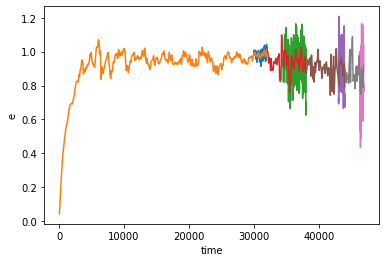

In [20]:
T4.plot();
LT4.plot();
T8.plot();
LT8.plot();
T16.plot();
LT16.plot();
T32.plot();
LT32.plot();
#plt.xlim(28000,44000); plt.ylim(0.4,0.7)

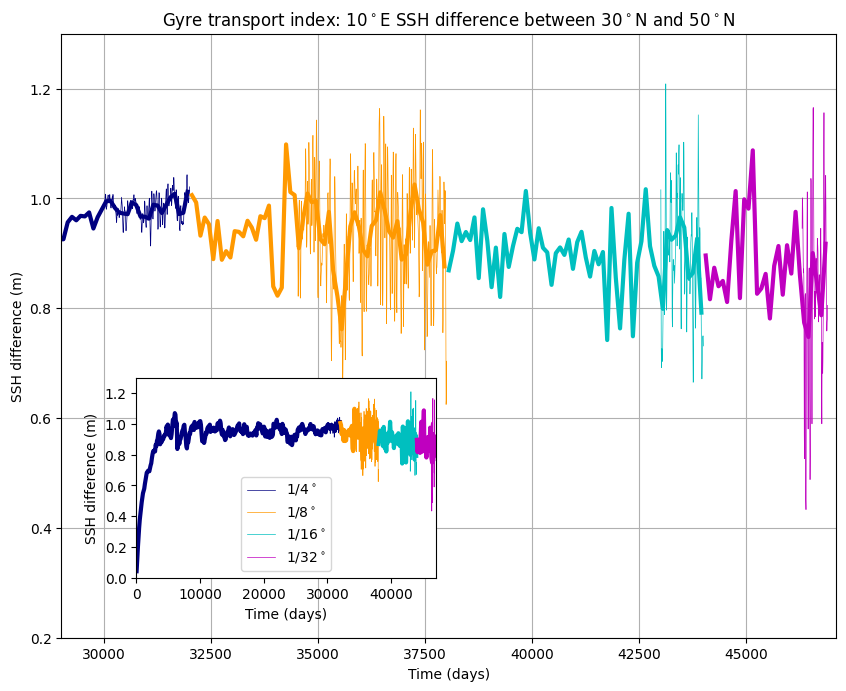

In [29]:
fig,ax = plt.subplots(1,1,figsize=(10,8),dpi=100)
def plot(ax, lw1=0.5, lw2=3):
    cyc = cycler(color=[[0,0,0.5], [1,.6,0], 'c', 'm'])
    ax.set_prop_cycle( cyc )
    (T4).plot(linewidth=lw1, label='1/4$^\circ$')
    (T8).plot(linewidth=lw1, label='1/8$^\circ$')
    (T16).plot(linewidth=lw1, label='1/16$^\circ$')
    (T32).plot(linewidth=lw1, label='1/32$^\circ$')
    ax.set_prop_cycle( cyc )
    (LT4).plot(linewidth=lw2)
    (LT8).plot(linewidth=lw2)
    (LT16).plot(linewidth=lw2)
    (LT32).plot(linewidth=lw2)
    plt.xlabel('Time (days)'); plt.ylabel('SSH difference (m)');
plot(ax)
plt.xlim(29000,47100); plt.ylim(0.2,1.3); plt.title('Gyre transport index: 10$^\circ$E SSH difference between 30$^\circ$N and 50$^\circ$N'); plt.grid();

ax = plt.axes((.2,.2,.3,.25))
plot(ax)
plt.xlim(0,47100); plt.ylim(0,1.3); plt.legend();
plt.savefig('gyre-transport-index-time-series-HMIX20.png')



In [26]:
print( 'End 1/4 T  =',T4.isel(time=slice(-200,-1)).mean(dim='time').values,'m')
print( 'Beg 1/8 T  =',T8.isel(time=slice(0,200)).mean(dim='time').values,'m')
print( 'End 1/8 T  =',T8.isel(time=slice(-200,-1)).mean(dim='time').values,'m')
print( 'Beg 1/16 T =',T16.isel(time=slice(0,200)).mean(dim='time').values,'m')
print( 'End 1/16 T =',T16.isel(time=slice(-200,-1)).mean(dim='time').values,'m')
print( 'all 1/32 T =',T32.mean(dim='time').values,'m')

End 1/4 T  = 0.98670906 m
Beg 1/8 T  = 0.93792105 m
End 1/8 T  = 0.93775296 m
Beg 1/16 T = 0.89499944 m
End 1/16 T = 0.89582145 m
all 1/32 T = 0.8287185 m


In [27]:
LT4.to_netcdf('LT4-HMIX20_10E.nc')
LT8.to_netcdf('LT8-HMIX20_10E.nc')
LT16.to_netcdf('LT16-HMIX20_10E.nc')
LT32.to_netcdf('LT32-HMIX20_10E.nc')
T4.to_netcdf('T4-HMIX20_10E.nc')
T8.to_netcdf('T8-HMIX20_10E.nc')
T16.to_netcdf('T16-HMIX20_10E.nc')
T32.to_netcdf('T32-HMIX20.nc')

In [ ]:
T4=xarray.open_dataset('T4-HMIX20_10E.nc')
T8=xarray.open_dataset('T8-HMIX20_10E.nc')
T16=xarray.open_dataset('T16-HMIX20_10E.nc')
T32=xarray.open_dataset('T32-HMIX20_10E.nc')